In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("C:/Users/gaurisonawane/Downloads/crime_data.csv")

In [4]:
data.head(10)

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6
5,Colorado,7.9,204,78,38.7
6,Connecticut,3.3,110,77,11.1
7,Delaware,5.9,238,72,15.8
8,Florida,15.4,335,80,31.9
9,Georgia,17.4,211,60,25.8


In [5]:
data.shape

(50, 5)

In [6]:
def norm_fun(i):
    x = (i-i.mean())/(i.max()-i.min())
    return (x)

In [7]:
df = norm_fun(data.iloc[:,1:])

In [8]:
df.head(10)

,Murder,Assault,UrbanPop,Rape
0,0.326024,0.223425,-0.127797,-0.000827
1,0.133253,0.315890,-0.297288,0.601240
2,0.018795,0.422055,0.245085,0.252403
3,0.060964,0.065890,-0.263390,-0.044755
4,0.073012,0.360411,0.431525,0.500465
5,0.006747,0.113836,0.211186,0.451370
6,-0.270361,-0.208082,0.194237,-0.261809
7,-0.113735,0.230274,0.109492,-0.140362
8,0.458554,0.562466,0.245085,0.275659
9,0.579036,0.137808,-0.093898,0.118036


In [10]:
#K-Means Clustering
from sklearn.cluster import KMeans

In [11]:
model = KMeans(n_clusters = 5)
model.fit(df)

KMeans(n_clusters=5)

In [12]:
model.labels_

array([4, 1, 1, 2, 1, 1, 0, 0, 1, 4, 0, 3, 1, 2, 3, 2, 2, 4, 3, 1, 0, 1,
       3, 4, 2, 2, 2, 1, 3, 0, 1, 1, 4, 3, 2, 2, 2, 0, 0, 4, 3, 4, 1, 0,
       3, 2, 2, 3, 3, 2])

In [13]:
md = pd.Series(model.labels_)
data['clust'] = md

In [14]:
data.iloc[:,1:5].groupby(data.clust).mean()

,Murder,Assault,UrbanPop,Rape
clust,,,,
0,4.900000,137.750000,80.625000,16.037500
1,10.966667,264.000000,76.500000,33.608333
2,6.853846,139.076923,63.384615,20.700000
3,2.680000,70.100000,51.000000,10.910000
4,14.671429,251.285714,54.285714,21.685714


In [15]:
#Hierarchical Clustering
import scipy.cluster.hierarchy as sch
from scipy.cluster.hierarchy import linkage

In [16]:
z = linkage(df, method = "complete", metric = "euclidean")

In [17]:
import matplotlib.pyplot as plt

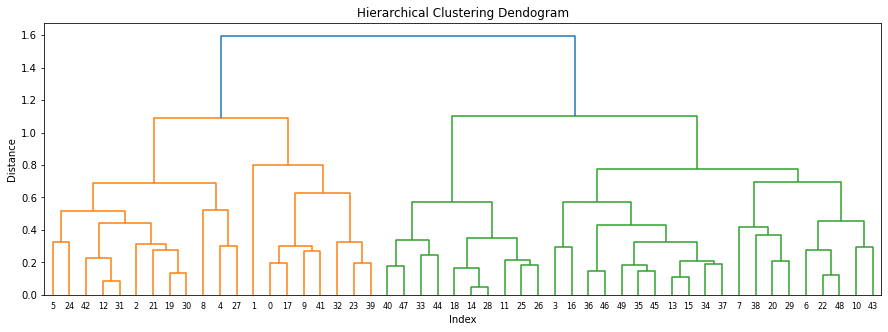

In [18]:
plt.figure(figsize = (15,5));
plt.title('Hierarchical Clustering Dendogram');
plt.xlabel('Index');
plt.ylabel('Distance')
sch.dendrogram(z, leaf_rotation = 0., leaf_font_size = 8.)
plt.show()


In [19]:
#DBSCAN
from sklearn.cluster import DBSCAN

In [20]:
array = df.values

In [21]:
array

array([[ 0.3260241 ,  0.22342466, -0.12779661, -0.00082687],
       [ 0.13325301,  0.31589041, -0.29728814,  0.60124031],
       [ 0.01879518,  0.42205479,  0.24508475,  0.2524031 ],
       [ 0.06096386,  0.06589041, -0.26338983, -0.04475452],
       [ 0.07301205,  0.36041096,  0.43152542,  0.50046512],
       [ 0.00674699,  0.11383562,  0.21118644,  0.45136951],
       [-0.27036145, -0.20808219,  0.19423729, -0.26180879],
       [-0.11373494,  0.23027397,  0.10949153, -0.14036176],
       [ 0.45855422,  0.56246575,  0.24508475,  0.27565891],
       [ 0.57903614,  0.13780822, -0.09389831,  0.11803618],
       [-0.14987952, -0.42726027,  0.2959322 , -0.02666667],
       [-0.31253012, -0.17383562, -0.19559322, -0.18170543],
       [ 0.1573494 ,  0.26794521,  0.2959322 ,  0.07152455],
       [-0.03542169, -0.19780822, -0.00915254, -0.00599483],
       [-0.33662651, -0.3930137 , -0.14474576, -0.25664083],
       [-0.10771084, -0.1909589 ,  0.00779661, -0.08351421],
       [ 0.11518072, -0.

In [22]:
from sklearn.preprocessing import StandardScaler

In [23]:
std_scaler = StandardScaler().fit(array)
X = std_scaler.transform(array)

In [24]:
X

array([[ 1.25517927,  0.79078716, -0.52619514, -0.00345116],
       [ 0.51301858,  1.11805959, -1.22406668,  2.50942392],
       [ 0.07236067,  1.49381682,  1.00912225,  1.05346626],
       [ 0.23470832,  0.23321191, -1.08449238, -0.18679398],
       [ 0.28109336,  1.2756352 ,  1.77678094,  2.08881393],
       [ 0.02597562,  0.40290872,  0.86954794,  1.88390137],
       [-1.04088037, -0.73648418,  0.79976079, -1.09272319],
       [-0.43787481,  0.81502956,  0.45082502, -0.58583422],
       [ 1.76541475,  1.99078607,  1.00912225,  1.1505301 ],
       [ 2.22926518,  0.48775713, -0.38662083,  0.49265293],
       [-0.57702994, -1.51224105,  1.21848371, -0.11129987],
       [-1.20322802, -0.61527217, -0.80534376, -0.75839217],
       [ 0.60578867,  0.94836277,  1.21848371,  0.29852525],
       [-0.13637203, -0.70012057, -0.03768506, -0.0250209 ],
       [-1.29599811, -1.39102904, -0.5959823 , -1.07115345],
       [-0.41468229, -0.67587817,  0.03210209, -0.34856705],
       [ 0.44344101, -0.

In [25]:
dbscan = DBSCAN(eps = 0.8, min_samples = 5)
dbscan.fit(X)

DBSCAN(eps=0.8)

In [26]:
dbscan.labels_

array([-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1,  0, -1,  0,  1,  0, -1,
       -1,  1, -1, -1, -1,  0, -1, -1,  0,  0, -1,  1, -1, -1, -1, -1,  1,
        0,  0, -1,  0, -1, -1,  1, -1, -1, -1, -1,  0, -1, -1,  1,  0],
      dtype=int64)

In [28]:
cl = pd.DataFrame(dbscan.labels_, columns = ['cluster'])
cl

,cluster
0,-1
1,-1
2,-1
3,-1
4,-1
5,-1
6,-1
7,-1
8,-1
9,-1


In [27]:
pd.concat([df, cl], axis = 1)

,Murder,Assault,UrbanPop,Rape,cluster
0,0.326024,0.223425,-0.127797,-0.000827,-1
1,0.133253,0.315890,-0.297288,0.601240,-1
2,0.018795,0.422055,0.245085,0.252403,-1
3,0.060964,0.065890,-0.263390,-0.044755,-1
4,0.073012,0.360411,0.431525,0.500465,-1
5,0.006747,0.113836,0.211186,0.451370,-1
6,-0.270361,-0.208082,0.194237,-0.261809,-1
7,-0.113735,0.230274,0.109492,-0.140362,-1
8,0.458554,0.562466,0.245085,0.275659,-1
9,0.579036,0.137808,-0.093898,0.118036,-1
